Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

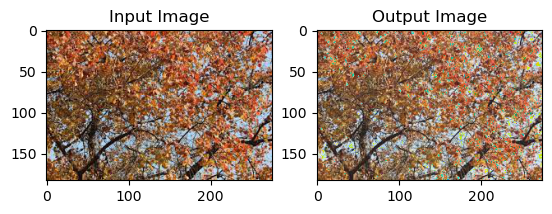

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load image
image = Image.open("input_image.jpg")
width, height = image.size
image_array = np.array(image)

# Define fitness function
def fitness(image_array, output_array):
    mse = np.mean((image_array - output_array) **2)
    return mse

n_fireflies = 4
n_iterations = 100
beta0 = 0.5
gamma = 0.97
alpha = 0.2
intensity_range = 255

fireflies = np.random.rand(n_fireflies) * intensity_range
output_array = np.zeros_like(image_array)
intensities = [fitness(image_array, output_array) for _ in range(n_fireflies)]

best_intensity = max(intensities)
best_firefly = fireflies[np.argmax(intensities)]

for iteration in range(n_iterations):
    print("Iteration:", iteration)
    for i in range(n_fireflies):
        for j in range(n_fireflies):
            if intensities[j] > intensities[i]:
                r = np.sqrt(np.sum((fireflies[i] - fireflies[j])**2))
                beta = beta0 * np.exp(-gamma * (r ** 2))
                fireflies[i] += beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand() - 0.5) * intensity_range
                fireflies[i] = np.clip(fireflies[i], 0, intensity_range)
                for row in range(height):
                    for col in range(width):
                        pixel = image_array[row, col]
                        new_pixel = np.clip(pixel + fireflies[i], 0, intensity_range)
                        output_array[row, col] = new_pixel
                output_array = np.clip(output_array, 0, intensity_range)
                intensities[i] = fitness(image_array, output_array)

    best_intensity = max(max(intensities), best_intensity)
    best_firefly = fireflies[np.argmax(intensities)]

best_brightness = int(round(best_firefly))

output_array = np.zeros_like(image_array)
for row in range(height):
    for col in range(width):
        pixel = image_array[row, col]
        new_pixel = np.clip(pixel + best_brightness - intensity_range, 0, intensity_range)
        output_array[row, col] = new_pixel

output_image = Image.fromarray(output_array.astype('uint8'))
output_image.show()

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image)
axs[0].set_title("Input Image")
axs[1].imshow(output_image)
axs[1].set_title("Output Image")
output_image.save("output_image.jpg")
plt.show()